# Import

In [739]:
import numpy as np, pandas as pd,xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [740]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [741]:
df = pd.read_csv('df-raw inputs.csv',index_col=0)


In [742]:
df

,Population,Growth Rate,Toronto Detached Homes - Jan,Prime Mortgage Rate -Jan,Unemployment - Ontario,Housing Starts,Non-Res Construction Price Index Toronto
Year,,,,,,,
2001.0,4694000.0,0.019,266602.0,7.25,5.7,41017.0,58.4
2002.0,4777000.0,0.018,285269.0,3.75,7.5,43805.0,59.5
2003.0,4861000.0,0.018,310855.0,4.50,6.9,45475.0,61.4
2004.0,4948000.0,0.018,339620.0,4.25,6.6,42115.0,64.1
2005.0,5035000.0,0.018,361408.0,4.25,6.7,41596.0,68.2
2006.0,5125000.0,0.018,353000.0,5.25,6.6,37080.0,72.5
2007.0,5216000.0,0.018,411132.0,6.00,6.5,33293.0,77.4
2008.0,5309000.0,0.018,429794.0,5.75,6.4,42212.0,83.0
2009.0,5403000.0,0.018,449244.0,3.00,8.1,25949.0,86.7


In [743]:
df=df.iloc[:-1,:]
df

,Population,Growth Rate,Toronto Detached Homes - Jan,Prime Mortgage Rate -Jan,Unemployment - Ontario,Housing Starts,Non-Res Construction Price Index Toronto
Year,,,,,,,
2001.0,4694000.0,0.019,266602.0,7.25,5.7,41017.0,58.4
2002.0,4777000.0,0.018,285269.0,3.75,7.5,43805.0,59.5
2003.0,4861000.0,0.018,310855.0,4.50,6.9,45475.0,61.4
2004.0,4948000.0,0.018,339620.0,4.25,6.6,42115.0,64.1
2005.0,5035000.0,0.018,361408.0,4.25,6.7,41596.0,68.2
2006.0,5125000.0,0.018,353000.0,5.25,6.6,37080.0,72.5
2007.0,5216000.0,0.018,411132.0,6.00,6.5,33293.0,77.4
2008.0,5309000.0,0.018,429794.0,5.75,6.4,42212.0,83.0
2009.0,5403000.0,0.018,449244.0,3.00,8.1,25949.0,86.7


In [744]:
df.dtypes


Population                                  float64
Growth Rate                                 float64
Toronto Detached Homes - Jan                float64
Prime Mortgage Rate -Jan                    float64
Unemployment - Ontario                      float64
Housing Starts                              float64
Non-Res Construction Price Index Toronto    float64
dtype: object

In [745]:
df = df.apply(pd.to_numeric)


## EDA (exploratory data analyses)

In [746]:
df.corr()

,Population,Growth Rate,Toronto Detached Homes - Jan,Prime Mortgage Rate -Jan,Unemployment - Ontario,Housing Starts,Non-Res Construction Price Index Toronto
Population,1.000000,-0.897033,0.945558,-0.598070,-0.117029,-0.281741,0.987482
Growth Rate,-0.897033,1.000000,-0.905027,0.485530,0.278518,0.089989,-0.862891
Toronto Detached Homes - Jan,0.945558,-0.905027,1.000000,-0.466166,-0.358976,-0.158199,0.922432
Prime Mortgage Rate -Jan,-0.598070,0.485530,-0.466166,1.000000,-0.567404,0.211889,-0.538681
Unemployment - Ontario,-0.117029,0.278518,-0.358976,-0.567404,1.000000,-0.241085,-0.123338
Housing Starts,-0.281741,0.089989,-0.158199,0.211889,-0.241085,1.000000,-0.331129
Non-Res Construction Price Index Toronto,0.987482,-0.862891,0.922432,-0.538681,-0.123338,-0.331129,1.000000


Looks like population, growth rate, non res are all correlated to Detached home prices

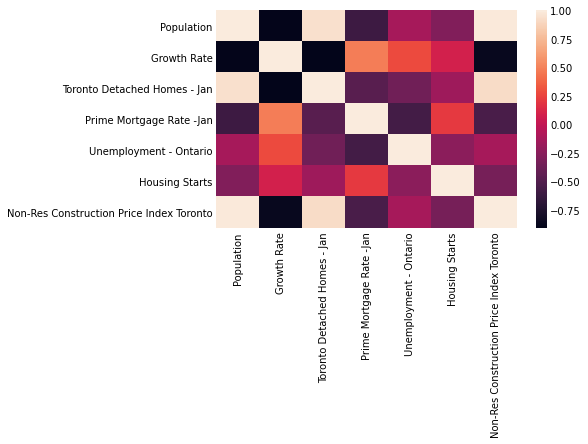

In [747]:
sns.heatmap(df.corr());


In [748]:
data=df[['Toronto Detached Homes - Jan']]

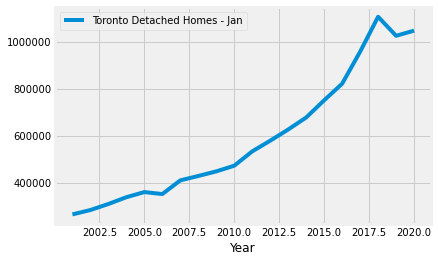

In [749]:
data.plot()
plt.ticklabel_format(style='plain')
plt.show()

# Model Building

In [750]:
df

,Population,Growth Rate,Toronto Detached Homes - Jan,Prime Mortgage Rate -Jan,Unemployment - Ontario,Housing Starts,Non-Res Construction Price Index Toronto
Year,,,,,,,
2001.0,4694000.0,0.019,266602.0,7.25,5.7,41017.0,58.4
2002.0,4777000.0,0.018,285269.0,3.75,7.5,43805.0,59.5
2003.0,4861000.0,0.018,310855.0,4.50,6.9,45475.0,61.4
2004.0,4948000.0,0.018,339620.0,4.25,6.6,42115.0,64.1
2005.0,5035000.0,0.018,361408.0,4.25,6.7,41596.0,68.2
2006.0,5125000.0,0.018,353000.0,5.25,6.6,37080.0,72.5
2007.0,5216000.0,0.018,411132.0,6.00,6.5,33293.0,77.4
2008.0,5309000.0,0.018,429794.0,5.75,6.4,42212.0,83.0
2009.0,5403000.0,0.018,449244.0,3.00,8.1,25949.0,86.7


In [751]:
n = len(df)
n

20

In [752]:
train_ratio = 0.8
train_size = int(n * train_ratio)

In [753]:
train_size

16

In [754]:
joined_train = df.iloc[0:16]
joined_valid = df.iloc[16:]
len(joined_train), len(joined_valid)

(16, 4)

In [755]:
joined_train.dtypes

Population                                  float64
Growth Rate                                 float64
Toronto Detached Homes - Jan                float64
Prime Mortgage Rate -Jan                    float64
Unemployment - Ontario                      float64
Housing Starts                              float64
Non-Res Construction Price Index Toronto    float64
dtype: object

In [756]:
df.rename(columns={'Toronto Detached Homes - Jan':'Avg_detached_price', 'Growth Rate': 'Growth_rate','Non-Res Construction Price Index Toronto':'Contruction_index'}, inplace=True)

In [757]:
df

,Population,Growth_rate,Avg_detached_price,Prime Mortgage Rate -Jan,Unemployment - Ontario,Housing Starts,Contruction_index
Year,,,,,,,
2001.0,4694000.0,0.019,266602.0,7.25,5.7,41017.0,58.4
2002.0,4777000.0,0.018,285269.0,3.75,7.5,43805.0,59.5
2003.0,4861000.0,0.018,310855.0,4.50,6.9,45475.0,61.4
2004.0,4948000.0,0.018,339620.0,4.25,6.6,42115.0,64.1
2005.0,5035000.0,0.018,361408.0,4.25,6.7,41596.0,68.2
2006.0,5125000.0,0.018,353000.0,5.25,6.6,37080.0,72.5
2007.0,5216000.0,0.018,411132.0,6.00,6.5,33293.0,77.4
2008.0,5309000.0,0.018,429794.0,5.75,6.4,42212.0,83.0
2009.0,5403000.0,0.018,449244.0,3.00,8.1,25949.0,86.7


In [758]:
mask = (df.columns.isin(['Population','Growth_rate','Contruction_index']))

In [759]:
cols = df.columns[mask]

In [760]:
df2=df.loc[:,mask]


In [761]:
df2

,Population,Growth_rate,Contruction_index
Year,,,
2001.0,4694000.0,0.019,58.4
2002.0,4777000.0,0.018,59.5
2003.0,4861000.0,0.018,61.4
2004.0,4948000.0,0.018,64.1
2005.0,5035000.0,0.018,68.2
2006.0,5125000.0,0.018,72.5
2007.0,5216000.0,0.018,77.4
2008.0,5309000.0,0.018,83.0
2009.0,5403000.0,0.018,86.7


In [762]:
X = df2
y = df.Avg_detached_price

In [763]:
len(X),len(y)

(20, 20)

In [764]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)


Coefficients: 
 [ 7.86977951e-01  6.66282879e+06 -8.62928664e+03]
Variance score: 0.7926655897513184


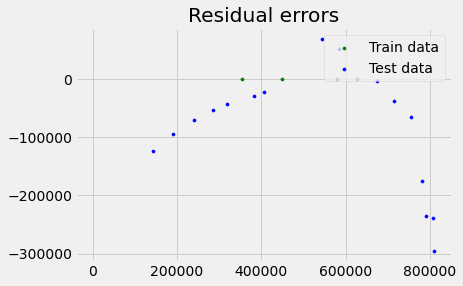

In [765]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

Best possible score is 1.0, lower values are worse.

## Simple LR

In [766]:
mask = (df.columns.isin(['Population']))

In [767]:
cols = df.columns[mask]

In [768]:
df3=df.loc[:,mask]

In [769]:
X = df3
y = df.Avg_detached_price

In [770]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

In [771]:
regr = linear_model.LinearRegression()

In [772]:
regr.fit(X_train, y_train)

LinearRegression()

In [773]:
y_pred = regr.predict(X_test)

In [774]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.45135814]
Mean squared error: 19883445786.73
Variance score: 0.76


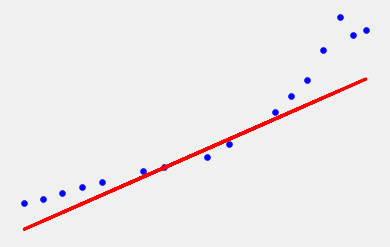

In [775]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [776]:
y_pred

array([262554.32613547, 741896.67386453, 383518.30842491, 553680.3282873 ,
       223286.16770569, 677352.45943397, 301822.48456525, 774394.46015125,
       425494.61571192, 185372.08370452, 645757.389433  , 147909.35784622,
       826300.64658142, 800121.8742949 , 511252.66285742, 709398.88757782])

In [779]:
y_test

Year
2004.0     339620.0
2017.0     957415.0
2007.0     411132.0
2011.0     534238.0
2003.0     310855.0
2015.0     751112.0
2005.0     361408.0
2018.0    1105680.0
2008.0     429794.0
2002.0     285269.0
2014.0     678080.0
2001.0     266602.0
2020.0    1046713.0
2019.0    1024821.0
2010.0     473441.0
2016.0     821499.0
Name: Avg_detached_price, dtype: float64